# Exploratory Data Analysis

Notebook para conter a EDA dos dados do projeto

In [54]:
import random

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Target Variables

---
## Exploração Inicial

In [2]:
targets = pd.read_pickle('../data/processed-data/targets.pkl')

In [3]:
targets.info()
targets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506176 entries, 0 to 2506175
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Dt        datetime64[ns]
 1   IdPlayer  int64         
 2   target1   float32       
 3   target2   float32       
 4   target3   float32       
 5   target4   float32       
dtypes: datetime64[ns](1), float32(4), int64(1)
memory usage: 76.5 MB


,Dt,IdPlayer,target1,target2,target3,target4
0,2018-01-01,628317,0.011167,4.474708,0.005168,5.735294
1,2018-01-01,547989,0.042993,5.593385,0.045033,2.794118
2,2018-01-01,519317,0.974327,56.177044,13.693746,64.166664
3,2018-01-01,607625,0.006700,2.675097,0.005168,1.862745
4,2018-01-01,592547,0.001117,0.632296,0.002953,0.931373


In [4]:
# describe the targets
trg_cols = ['target1', 'target2', 'target3', 'target4']
round(targets[trg_cols].describe(), 2)

,target1,target2,target3,target4
count,2506176.00,2506176.00,2506176.00,2506176.00
mean,0.57,2.46,0.69,1.14
std,4.17,6.23,5.07,4.23
min,0.00,0.00,0.00,0.00
25%,0.00,0.08,0.00,0.05
50%,0.00,0.56,0.00,0.22
75%,0.02,2.24,0.02,0.76
max,100.00,100.00,100.00,100.00


---
### Histogramas

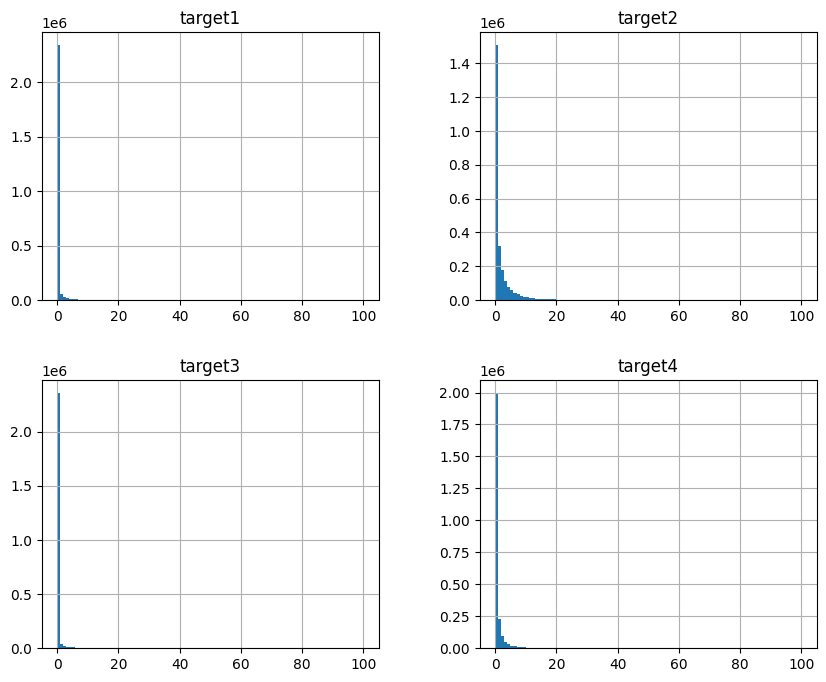

In [5]:
targets[trg_cols].hist(figsize=(10, 8), bins=100);

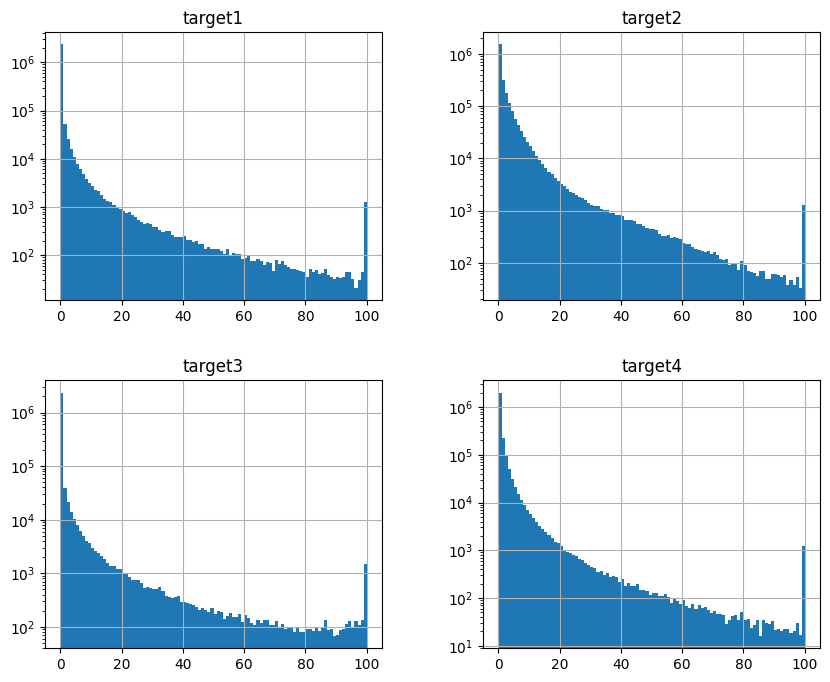

In [6]:
targets[trg_cols].hist(figsize=(10, 8), bins=100, log=True);

---
### Boxplots

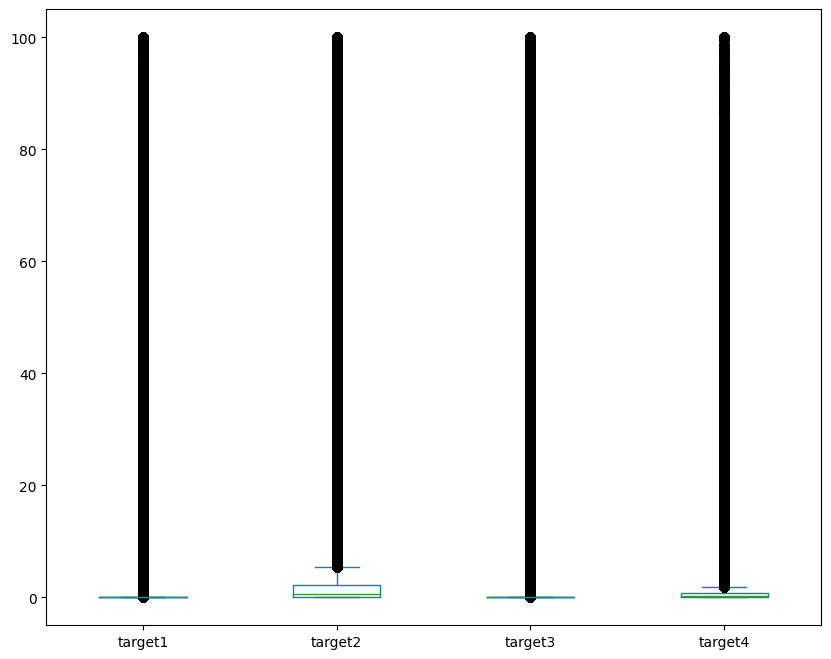

In [7]:
targets[trg_cols].plot(kind='box', figsize=(10, 8));

---
### Correlação

In [8]:
corr = targets[trg_cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,target1,target2,target3,target4
target1,1.000000,0.404532,0.411024,0.384962
target2,0.404532,1.000000,0.388134,0.548991
target3,0.411024,0.388134,1.000000,0.370333
target4,0.384962,0.548991,0.370333,1.000000


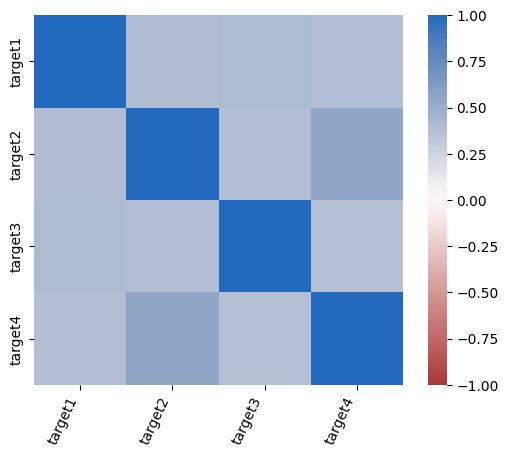

In [9]:
ax = sns.heatmap( corr,
				vmin=-1, vmax=1, center=0,
				cmap='vlag_r', #sns.diverging_palette(20, 220, n=200),
				square=True
)

ax.set_xticklabels(
	ax.get_xticklabels(),
	rotation=65,
	horizontalalignment='right'
);


---
### Scatter

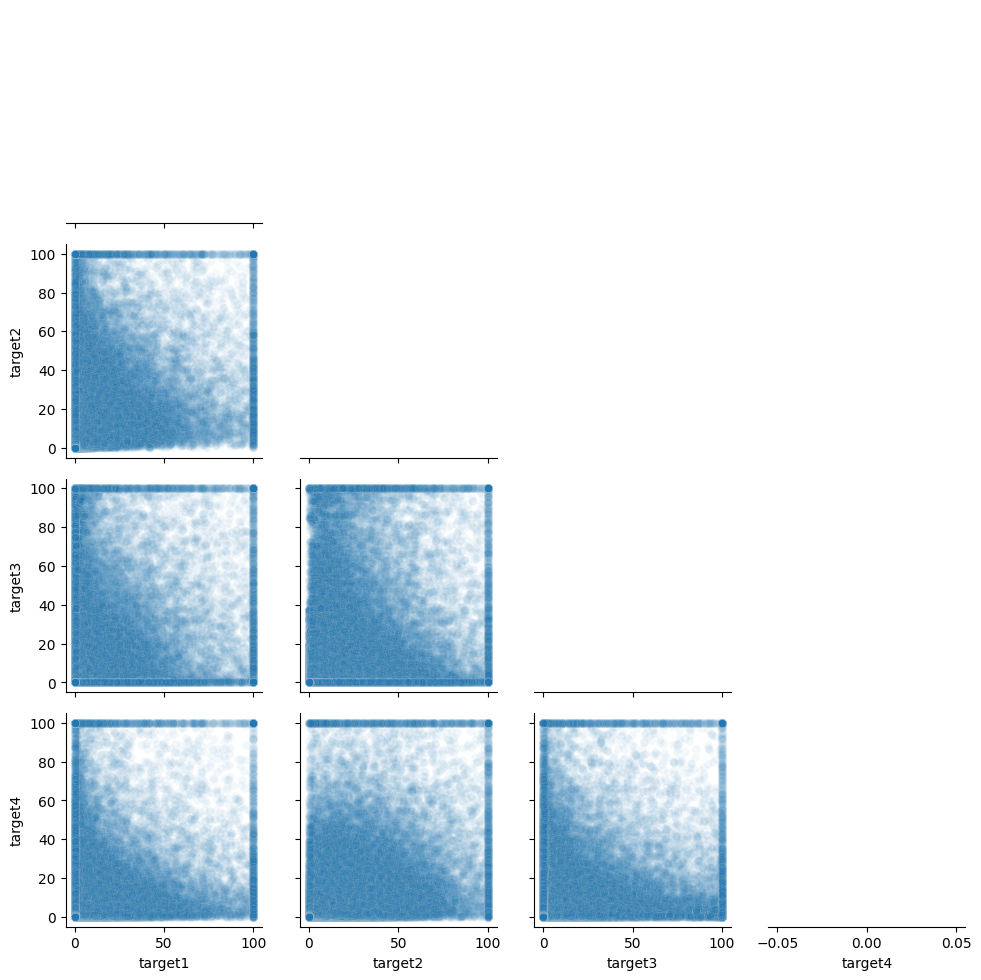

In [10]:
sns.PairGrid(targets[trg_cols], corner=True)\
    .map_lower(sns.scatterplot, alpha = 0.05)\
    .map_diag(sns.scatterplot, alpha = 0.05);

In [11]:
# sns.PairGrid(
#     targets[trg_cols], diag_sharey=False
# ).map_lower(
#     sns.scatterplot
# ).map_upper(
#     sns.kdeplot, levels=4, color=".2"
# ).map_diag(
#     sns.histplot, kde=True, element="step", bins=100
# );

In [55]:
target_means = targets.groupby('Dt').median()[trg_cols]
target_means.head()

,target1,target2,target3,target4
Dt,,,,
2018-01-01,0.0,1.556420,0.0,0.441176
2018-01-02,0.0,0.867444,0.0,0.330827
2018-01-03,0.0,0.801282,0.0,0.386930
2018-01-04,0.0,1.043176,0.0,0.552486
2018-01-05,0.0,0.489579,0.0,0.213630


In [56]:
target_means_melted = target_means.melt(var_name='target', value_name='value', ignore_index=False)
target_means_melted.reset_index(inplace=True)
target_means_melted.head()

,Dt,target,value
0,2018-01-01,target1,0.0
1,2018-01-02,target1,0.0
2,2018-01-03,target1,0.0
3,2018-01-04,target1,0.0
4,2018-01-05,target1,0.0


KeyError: "None of [Index([(2018-01-01 00:00:00, 2018-01-02 00:00:00, 2018-01-03 00:00:00, 2018-01-04 00:00:00, 2018-01-05 00:00:00, 2018-01-06 00:00:00, 2018-01-07 00:00:00, 2018-01-08 00:00:00, 2018-01-09 00:00:00, 2018-01-10 00:00:00, 2018-01-11 00:00:00, 2018-01-12 00:00:00, 2018-01-13 00:00:00, 2018-01-14 00:00:00, 2018-01-15 00:00:00, 2018-01-16 00:00:00, 2018-01-17 00:00:00, 2018-01-18 00:00:00, 2018-01-19 00:00:00, 2018-01-20 00:00:00, 2018-01-21 00:00:00, 2018-01-22 00:00:00, 2018-01-23 00:00:00, 2018-01-24 00:00:00, 2018-01-25 00:00:00, 2018-01-26 00:00:00, 2018-01-27 00:00:00, 2018-01-28 00:00:00, 2018-01-29 00:00:00, 2018-01-30 00:00:00, 2018-01-31 00:00:00, 2018-02-01 00:00:00, 2018-02-02 00:00:00, 2018-02-03 00:00:00, 2018-02-04 00:00:00, 2018-02-05 00:00:00, 2018-02-06 00:00:00, 2018-02-07 00:00:00, 2018-02-08 00:00:00, 2018-02-09 00:00:00, 2018-02-10 00:00:00, 2018-02-11 00:00:00, 2018-02-12 00:00:00, 2018-02-13 00:00:00, 2018-02-14 00:00:00, 2018-02-15 00:00:00, 2018-02-16 00:00:00, 2018-02-17 00:00:00, 2018-02-18 00:00:00, 2018-02-19 00:00:00, 2018-02-20 00:00:00, 2018-02-21 00:00:00, 2018-02-22 00:00:00, 2018-02-23 00:00:00, 2018-02-24 00:00:00, 2018-02-25 00:00:00, 2018-02-26 00:00:00, 2018-02-27 00:00:00, 2018-02-28 00:00:00, 2018-03-01 00:00:00, 2018-03-02 00:00:00, 2018-03-03 00:00:00, 2018-03-04 00:00:00, 2018-03-05 00:00:00, 2018-03-06 00:00:00, 2018-03-07 00:00:00, 2018-03-08 00:00:00, 2018-03-09 00:00:00, 2018-03-10 00:00:00, 2018-03-11 00:00:00, 2018-03-12 00:00:00, 2018-03-13 00:00:00, 2018-03-14 00:00:00, 2018-03-15 00:00:00, 2018-03-16 00:00:00, 2018-03-17 00:00:00, 2018-03-18 00:00:00, 2018-03-19 00:00:00, 2018-03-20 00:00:00, 2018-03-21 00:00:00, 2018-03-22 00:00:00, 2018-03-23 00:00:00, 2018-03-24 00:00:00, 2018-03-25 00:00:00, 2018-03-26 00:00:00, 2018-03-27 00:00:00, 2018-03-28 00:00:00, 2018-03-29 00:00:00, 2018-03-30 00:00:00, 2018-03-31 00:00:00, 2018-04-01 00:00:00, 2018-04-02 00:00:00, 2018-04-03 00:00:00, 2018-04-04 00:00:00, 2018-04-05 00:00:00, 2018-04-06 00:00:00, 2018-04-07 00:00:00, 2018-04-08 00:00:00, 2018-04-09 00:00:00, 2018-04-10 00:00:00, ...), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0005023989360779524, 0.00027987841167487204, 0.000385280727641657, 0.00032208088668994606, 0.0009696875931695104, 0.00044300712761469185, 0.0003791900526266545, 0.0006034602411091328, 0.0005045790458098054, 0.00038915048935450613, 0.00031310663325712085, 0.0006435379036702216, 0.00041850985144264996, 0.00038985139690339565, 0.00023694717674516141, 0.0009451349033042789, 0.0005901341210119426, 0.0013312565861269832, 0.0007705406751483679, 0.00030330143636092544, 0.0004405926738400012, 0.0010224843863397837, 0.00023005429829936475, 0.000285363697912544, 0.0011045451974496245, 0.00017772121645975858, 0.0, 0.0013487632386386395, 0.0, 0.0005058808601461351, 0.00020731189579237252, 0.0004164497659076005, 0.00030393197084777057, 0.0015389587497338653, 0.0003533581329975277, 0.00015507506032008678, 0.0005050402833148837, 0.000260988250374794, 0.00027104016044177115, 0.00036171989631839097, 0.00028851203387603164, 0.0002990135399159044, 0.00022888951934874058, 0.0005240293685346842, 0.0003175429883413017, 0.0002649659290909767, 0.0005409367149695754, 0.0008864108822308481, 0.0007860563928261399, 0.0011272653937339783, 0.000723957025911659, 0.0010234812507405877, 0.0009152011480182409, 0.0010334956459701061, 0.0008088717004284263, 0.0012926410418003798, 0.0014508891617879272, 0.0010030014673247933, 0.0010099327191710472, 0.0009417632245458663, 0.0007381122559309006, 0.0013728757621720433, 0.0014035009080544114, 0.0016566494014114141, 0.001502995495684445, 0.001139834988862276, 0.0013300171121954918, 0.0032333682756870985, 0.0012151184491813183, 0.0016035920707508922, 0.002505738055333495, 0.0016776600386947393, 0.0012845160672441125, 0.0012241760268807411, 0.0009509897790849209, 0.0010636148508638144, 0.001121903769671917, 0.0015026936307549477, 0.0010316510451957583, 0.0010494721354916692, 0.0008568906923756003, 0.00041233032243326306, 0.0003933198458980769, 0.0002661530452314764, 0.0004791475075762719, 0.0003080394526477903, 0.00024581278557889163, 0.00014436451601795852, 0.0003192847943864763, 0.0002878896484617144, 0.00020914492779411376, 0.00026861694641411304, 0.0003465119516476989, 0.0006692290771752596, 0.0002605876652523875, ...)], dtype='object')] are in the [columns]"

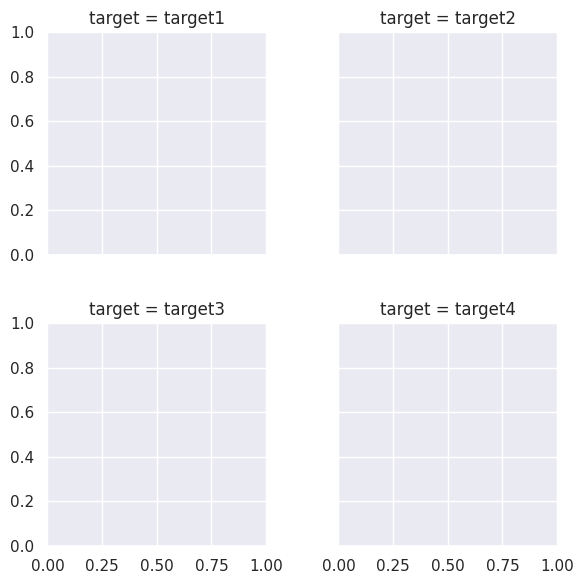

In [57]:
sns.FacetGrid(
    target_means_melted, 
    col='target', 
    col_wrap=2, 
    sharey=True
).map(
    sns.lineplot, 
    target_means_melted['Dt'], 
    target_means_melted['value']
);

In [ ]:
# figure, axes = plt.subplots(2, 2, figsize=(10, 8))
# for i, ax in enumerate(axes.flatten()):
#     sns.lineplot(data=targets, x='Dt', y=trg_cols[i], ax=ax)
#     ax.set_title(trg_cols[i])


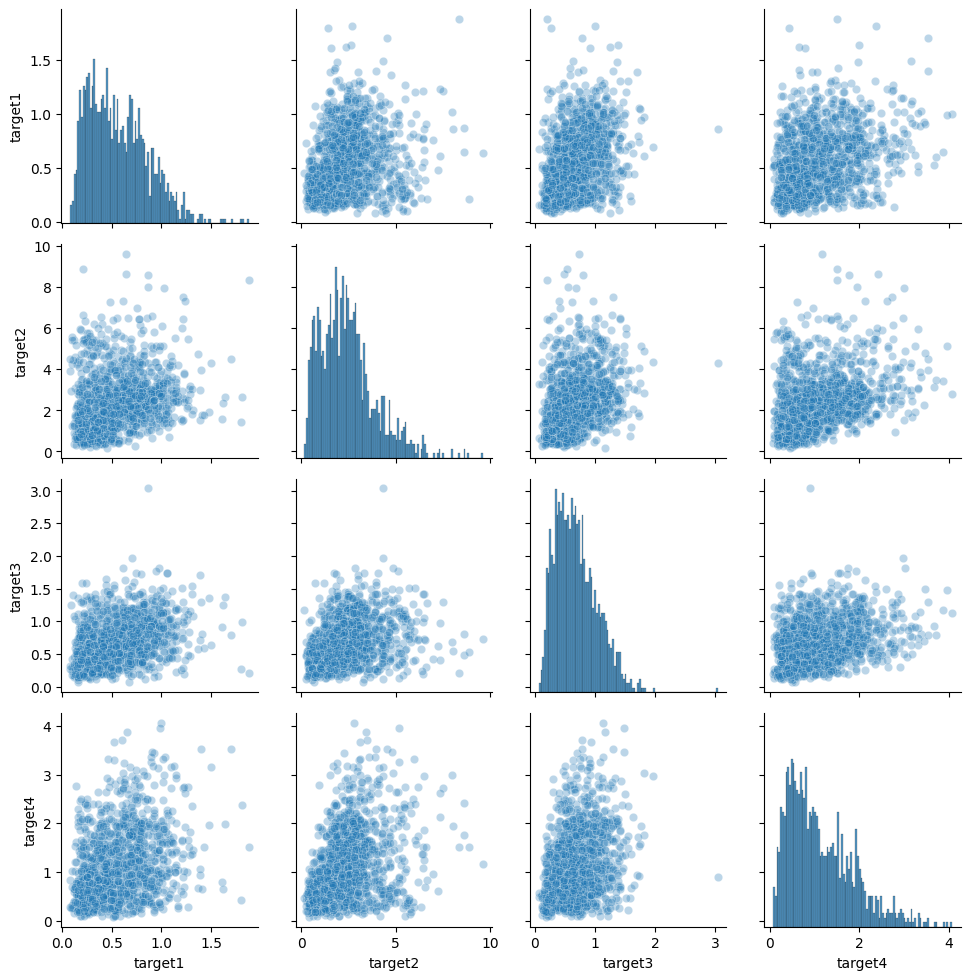

In [ ]:
alpha = 0.3
sns.PairGrid(target_means)\
    .map_lower(sns.scatterplot, alpha = alpha)\
    .map_upper(sns.kdeplot)\
    .map_diag(sns.histplot, bins=100);

### Lineplot

In [62]:
target_means.reset_index(inplace=True)

<AxesSubplot: xlabel='Dt', ylabel='target1'>

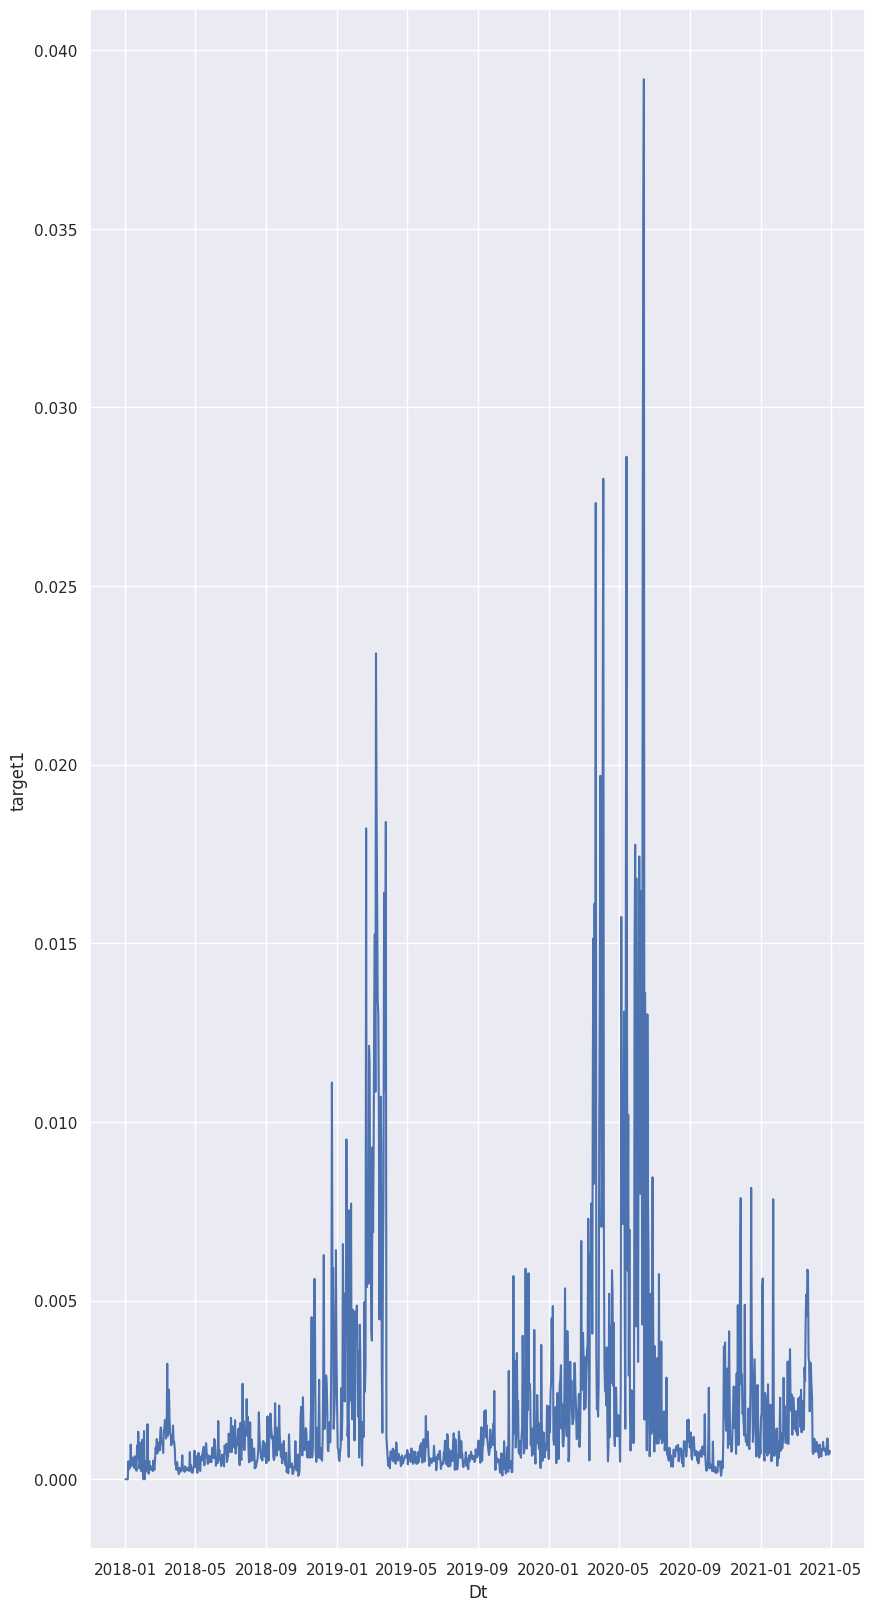

In [59]:
sns.lineplot(x=target_means['Dt'], y=target_means['target1'])

In [63]:
target_means_melted

,Dt,target,value
0,2018-01-01,target1,0.000000
1,2018-01-02,target1,0.000000
2,2018-01-03,target1,0.000000
3,2018-01-04,target1,0.000000
4,2018-01-05,target1,0.000000
...,...,...,...
4859,2021-04-26,target4,0.341915
4860,2021-04-27,target4,0.458015
4861,2021-04-28,target4,0.392238
4862,2021-04-29,target4,0.494856


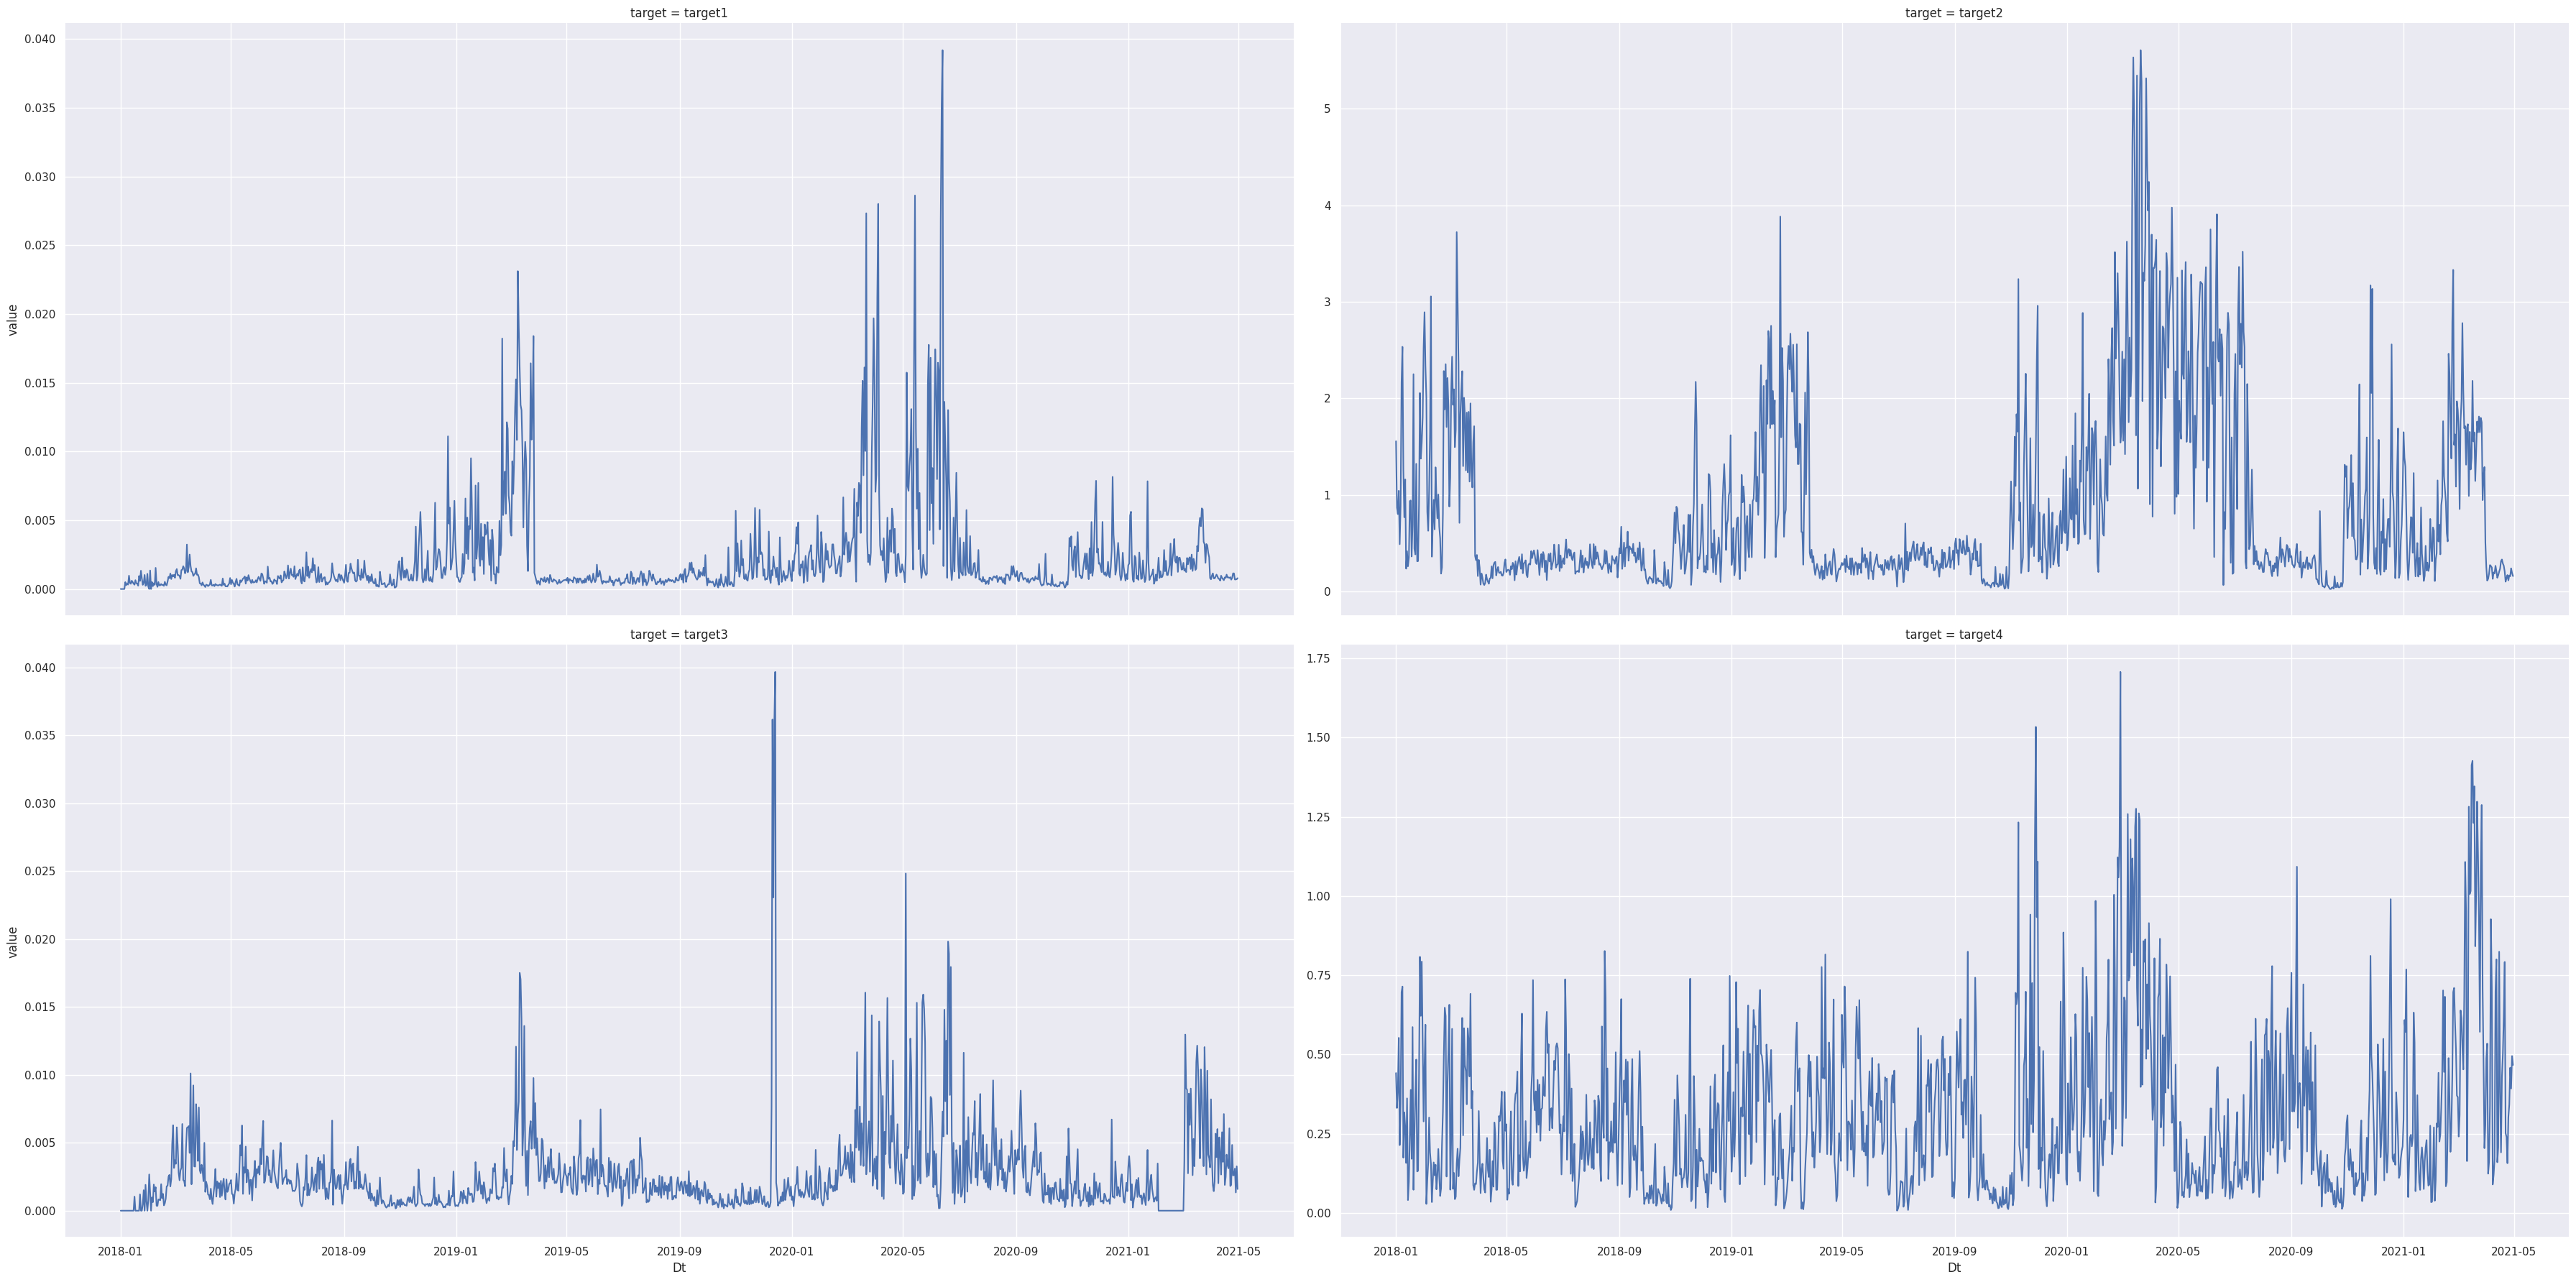

In [64]:
sns.set(rc={'figure.figsize':(10,20)})
sns.FacetGrid(target_means_melted, col='target', col_wrap=2, height=9,aspect=2, sharey=False)\
    .map(sns.lineplot, 'Dt', 'value');

### Analysing some players

In [40]:
players = random.sample(list(targets['IdPlayer'].unique()), 5)
players

[622694, 596112, 543766, 601713, 543309]

In [41]:
target_sample = targets[targets['IdPlayer'].isin(players)]
target_sample.head(10)

,Dt,IdPlayer,target1,target2,target3,target4
153,2018-01-01,596112,0.003350,3.453307,0.011074,0.392157
866,2018-01-01,543766,0.058069,4.280156,0.022147,2.107843
1004,2018-01-01,622694,0.000000,1.264591,0.000000,0.098039
1118,2018-01-01,543309,0.000000,3.745136,0.000000,1.225490
1420,2018-01-01,601713,0.005584,3.647860,0.002953,0.686275
2254,2018-01-02,601713,0.003422,1.545134,0.002472,0.300752
2376,2018-01-02,596112,0.001467,1.518027,0.011535,0.120301
3128,2018-01-02,622694,0.000000,0.704798,0.000000,0.030075
3603,2018-01-02,543766,0.038135,5.204662,3.497685,0.872180
3898,2018-01-02,543309,0.000000,1.626457,0.000000,0.751880


In [44]:
target_sample_melted = target_sample.melt(id_vars=['IdPlayer', 'Dt'], var_name='target', value_name='value', ignore_index=False)
target_sample_melted.head(10)

,IdPlayer,Dt,target,value
153,596112,2018-01-01,target1,0.003350
866,543766,2018-01-01,target1,0.058069
1004,622694,2018-01-01,target1,0.000000
1118,543309,2018-01-01,target1,0.000000
1420,601713,2018-01-01,target1,0.005584
2254,601713,2018-01-02,target1,0.003422
2376,596112,2018-01-02,target1,0.001467
3128,622694,2018-01-02,target1,0.000000
3603,543766,2018-01-02,target1,0.038135
3898,543309,2018-01-02,target1,0.000000


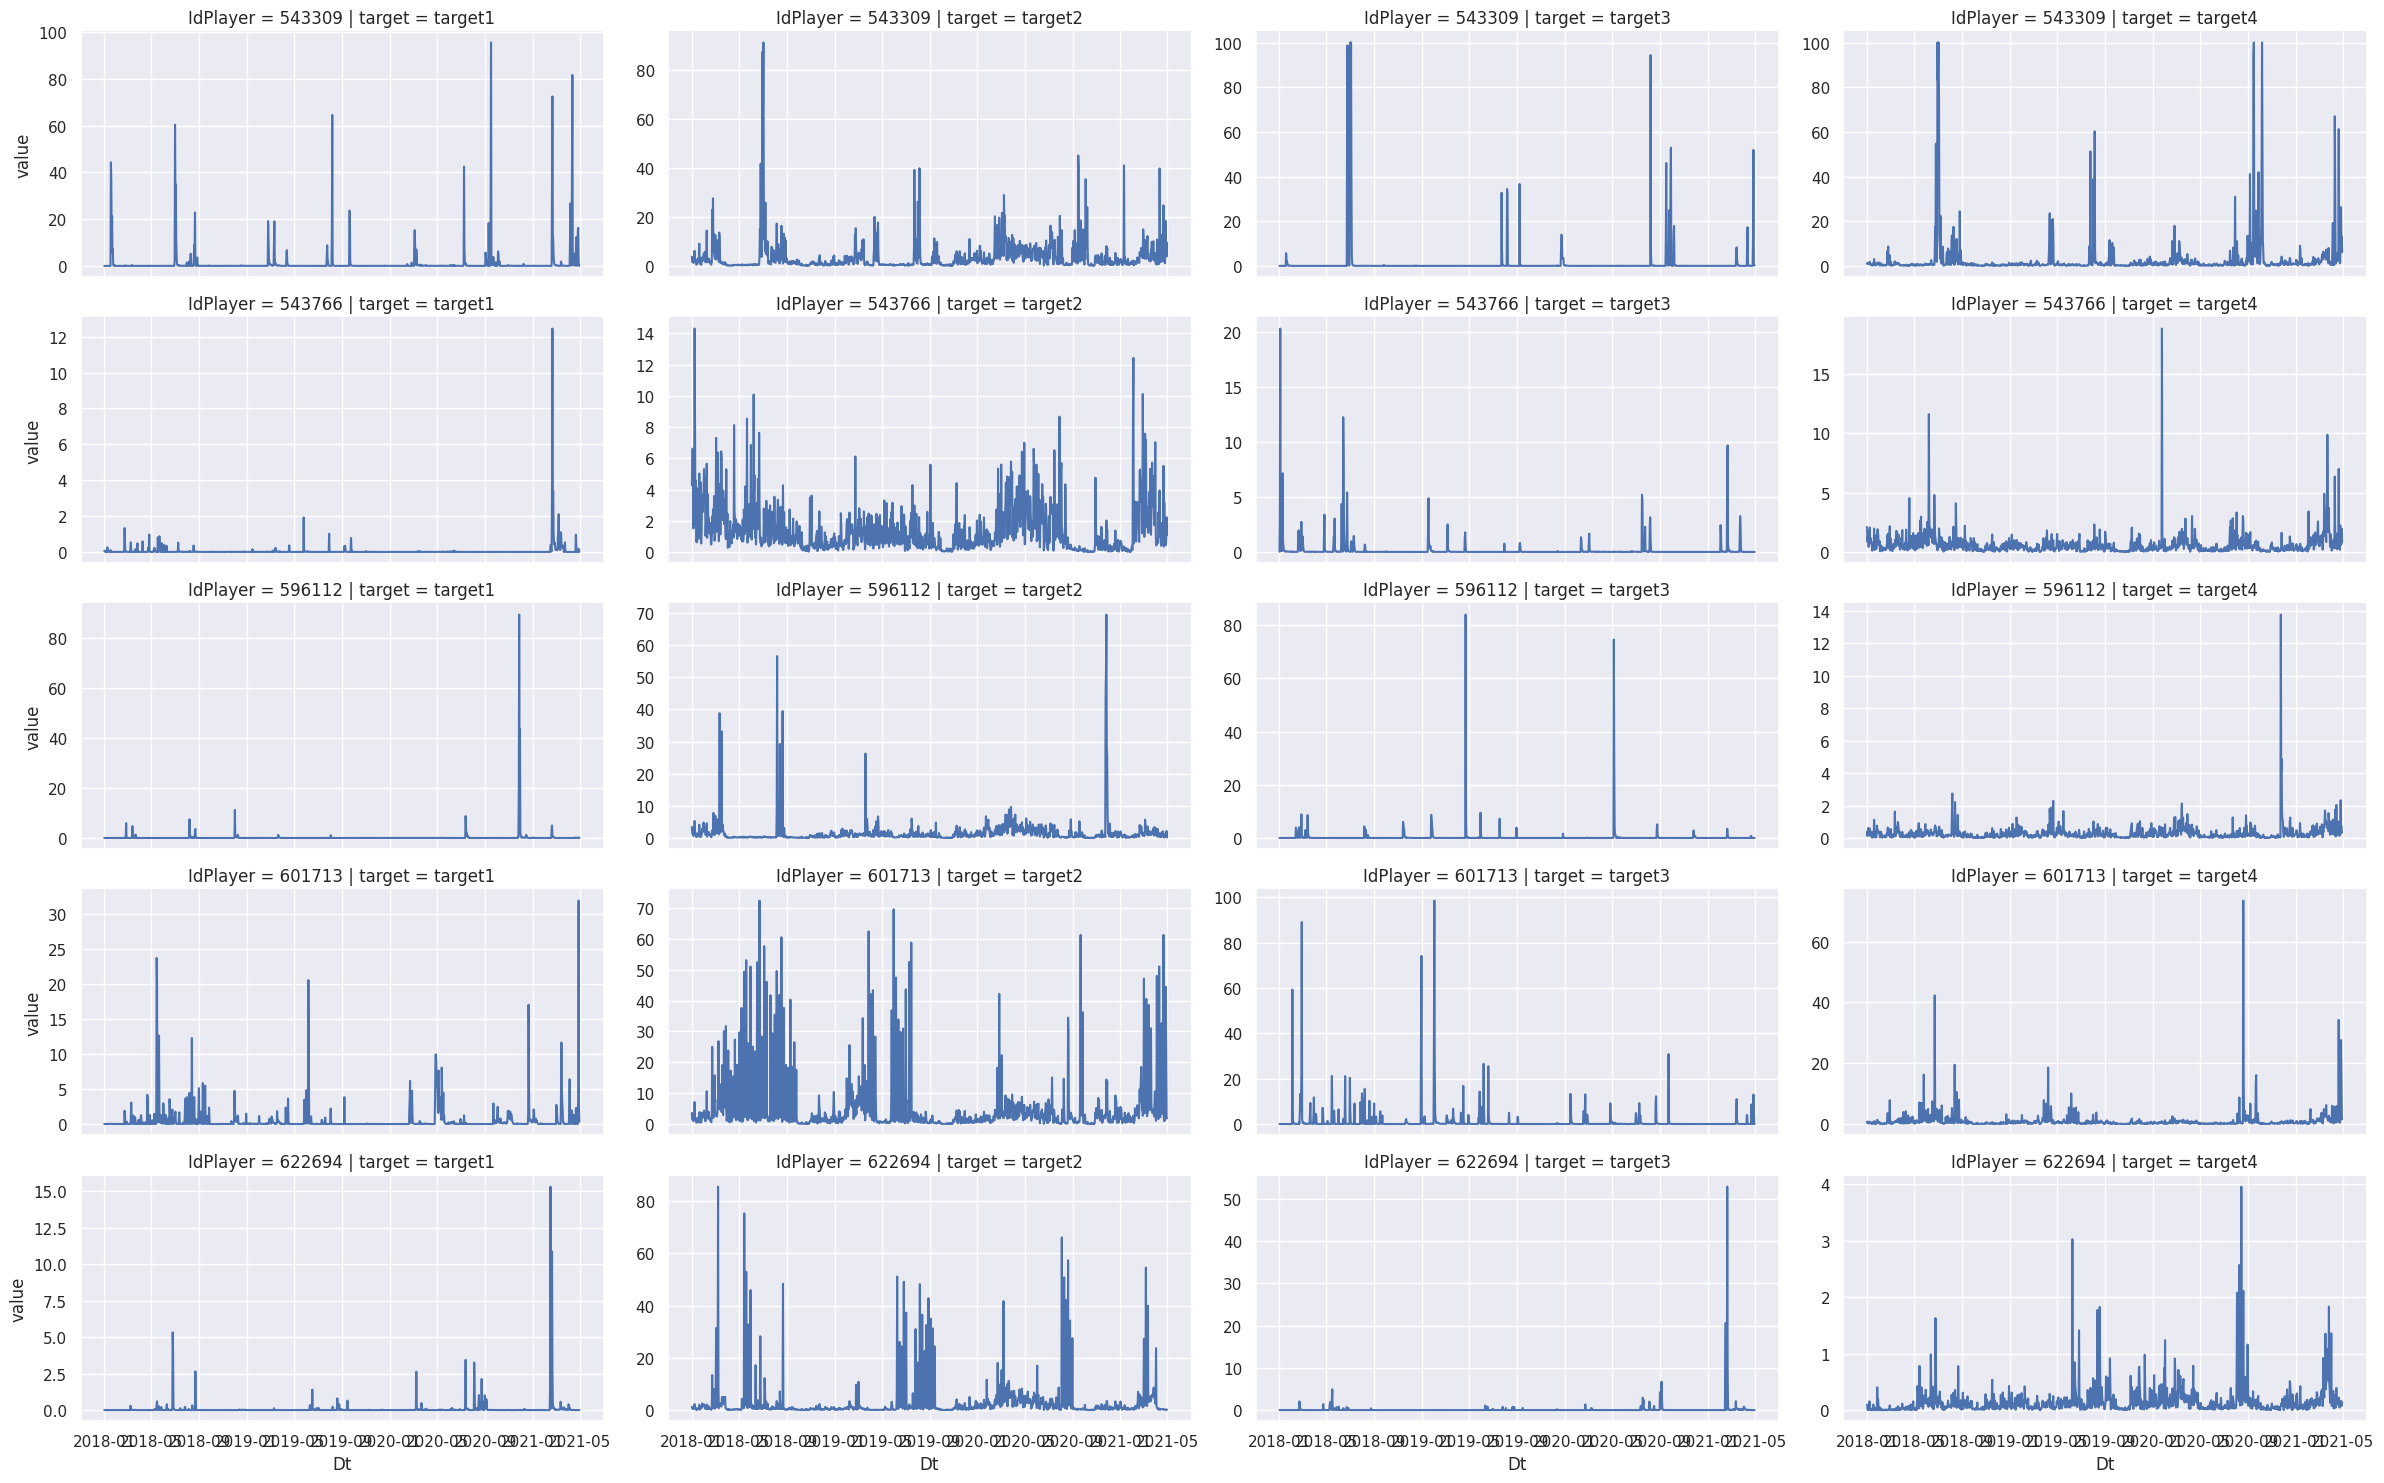

In [52]:
sns.set(rc={'figure.figsize':(10,20)})
sns.FacetGrid(target_sample_melted, row = 'IdPlayer', col='target', aspect = 2, sharey=False)\
    .map(sns.lineplot, 'Dt', 'value');

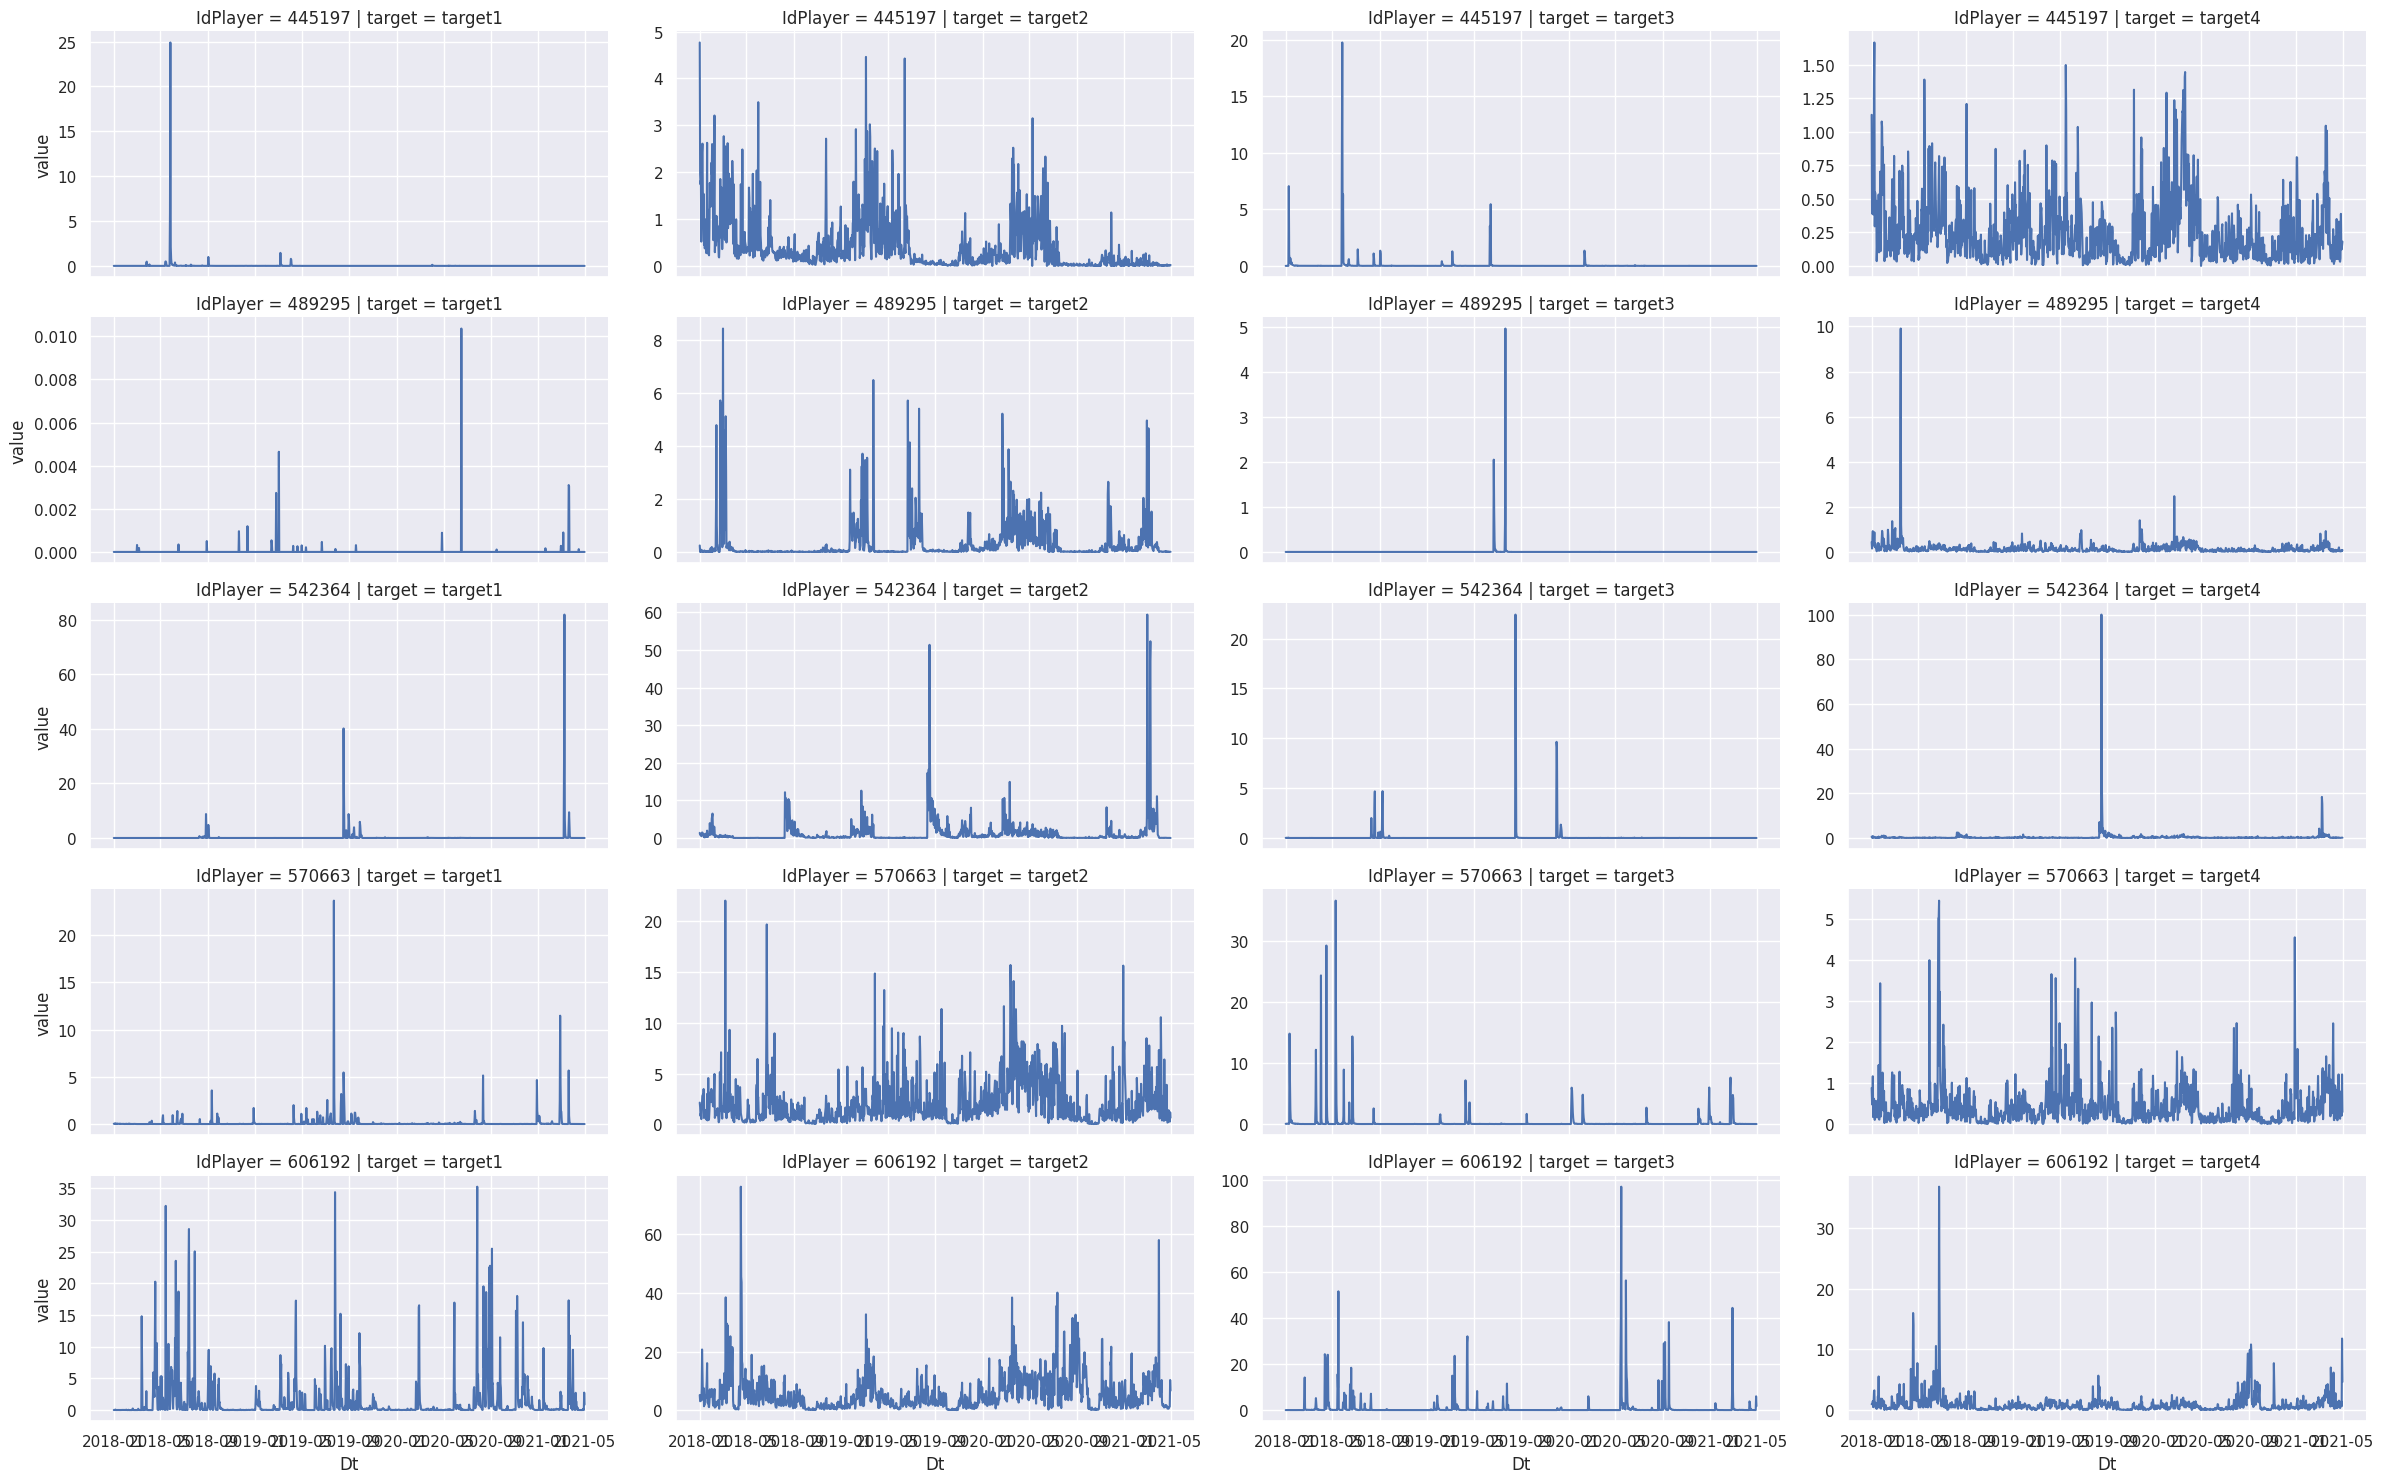

In [53]:
def random_player_analysis(df, n_players=5):
    players = random.sample(list(df['IdPlayer'].unique()), n_players)
    df = df[df['IdPlayer'].isin(players)]
    df_melted = df.melt(id_vars=['IdPlayer', 'Dt'], var_name='target', value_name='value', ignore_index=False)
    sns.set(rc={'figure.figsize':(10,20)})
    sns.FacetGrid(df_melted, row = 'IdPlayer', col='target', aspect = 2, sharey=False)\
        .map(sns.lineplot, 'Dt', 'value');

random_player_analysis(targets)

### Observações
+ 2 506 176 registros
+ Os targets variam de 0 a 100
+ Média bem próxima de 0
---
+ 1216 dias